# Part II - (FordGoBike Analysis Presentation)
## by Gaurav Yadav

> For the presentation, I focus on the usage of the service by users according to their gender, user category and age. I start by plotting a pie chart showing the gender distribution of the users followed by introducing a new column called start_hour that extracts the hour of the day when the users use the service. This is an important insight because it could help the service providers know what time of day to do repairs or maintenance for their bikes with affecting their users negatively.

## Investigation Overview

> The goal of this invetigation was to find out usage of the bikeshare system by the residents of San Francisco Bay area by answering some of the questions listed below:
- When are most trips taken in terms of time of day, day of the week, or month of the year?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in year 2019 for the month of February

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
ford_bike = pd.read_csv('fordgobike-tripdata.csv')

#make a copy of the dataframe
ford_copy = ford_bike.copy()

In [7]:
# Remove records without gender or year of birth
ford_copy.dropna(subset = ['member_birth_year', 'member_gender'], inplace=True)

# create age column
ford_copy['age'] = 2022-ford_copy['member_birth_year'].astype(int)

too_old = ford_copy[ford_copy['age'] > 100]
too_old[['user_type', 'member_gender', 'age']]

# drop the rows
ford_copy = ford_copy.drop(too_old.index, axis=0)

# change to datetime
ford_copy['start_time'] = pd.to_datetime(ford_copy['start_time'])
ford_copy['end_time'] = pd.to_datetime(ford_copy['end_time'])
ford_copy = ford_copy.sort_values(by='start_time')

# change user_type to category
ford_copy.user_type = ford_copy.user_type.astype('category')
# change member_gender to category
ford_copy.member_gender = ford_copy.member_gender.astype('category')

# extract month
ford_copy['start_time_month'] = ford_copy['start_time'].dt.strftime('%B')
# extract day
ford_copy['start_time_day'] = ford_copy['start_time'].dt.strftime('%a')

# change both to category datatype
ford_copy.start_time_month = ford_copy.start_time_month.astype('category')
ford_copy.start_time_day = ford_copy.start_time_day.astype('category')

## (Visualization 1)

> The pie char shows that male users constitute 75% while female users constitute 23% and 2% constututes of users who identify as other.

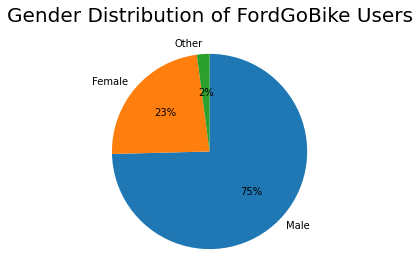

In [8]:
user_counts = ford_copy['member_gender'].value_counts()
plt.pie(user_counts, labels = user_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("Gender Distribution of FordGoBike Users", fontsize=20, y=1.07)
plt.axis('square');

## (Visualization 2)

The most popular hour of the day preferred by both users is in the evening at 1700h.

Subscribers prefer to start their rides at 0800h and 1700h while customers prefer to start their rides at 1700h

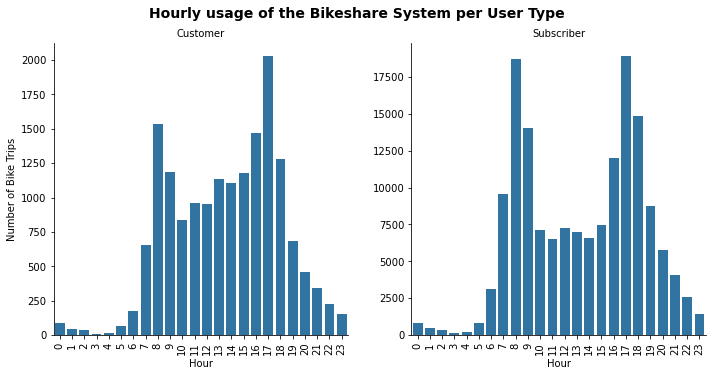

In [10]:
# Extract hour from the start_time
ford_copy['start_hour'] = ford_copy['start_time'].dt.hour
base_color = sns.color_palette()[0]
hour_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
m = sns.catplot(data=ford_copy, x='start_hour', col="user_type", kind='count', order=hour_order, sharex = True, sharey = False,
            color = base_color)
m.set_axis_labels("Hour", "Number of Bike Trips")
m.set_titles("{col_name}")
m.fig.suptitle('Hourly usage of the Bikeshare System per User Type', y=1.03, fontsize=14, fontweight='semibold')
m.set_xticklabels(rotation=90);

## (Visualization 3)

The analysis below indicates that customers use the service mostly on Thursday, Friday, Sunday, Monday and Tuesday. Subscribers however use the service mostly on weekdays and occasionally on the weekends, that is, Saturday and Sunday.

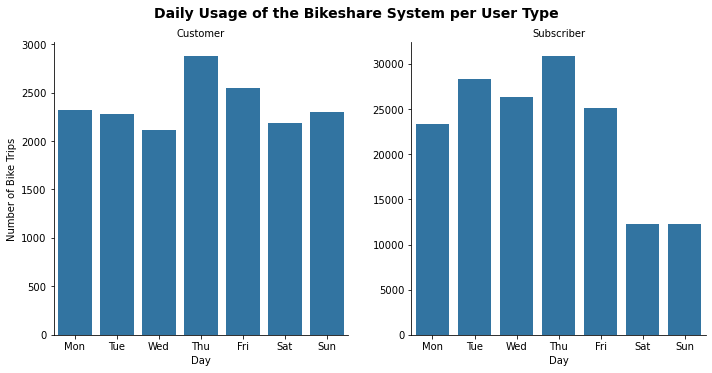

In [11]:
base_color = sns.color_palette()[0]

cat_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
k = sns.catplot(data=ford_copy, x='start_time_day', col="user_type", kind='count', sharey = False, order = cat_order, color = base_color)
k.set_axis_labels("Day", "Number of Bike Trips")
k.set_titles("{col_name}")
k.fig.suptitle('Daily Usage of the Bikeshare System per User Type', y=1.03, fontsize=14, fontweight='semibold');

## (Visualization 4)

From the charts below, we can see that male customers prefer to ride on Thursdays and Fridays while female customers prefer to ride on Thursday and Sunday. Customers who identify as other prefer to ride on Thursdays and Fridays while subscribers of the same category prefer to ride on Wednesdays and Thursdays.

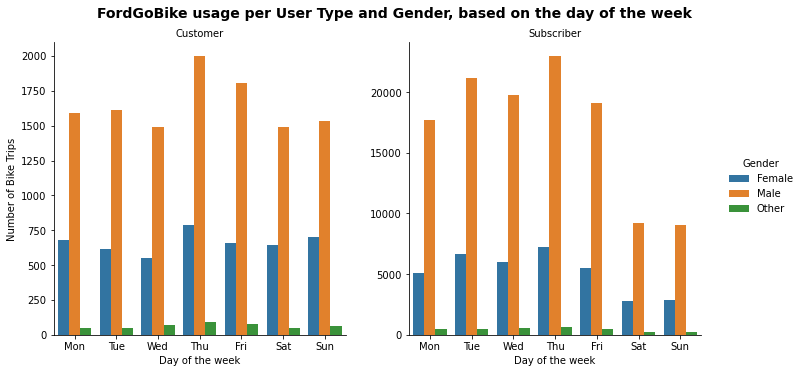

In [12]:
the_day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
k = sns.catplot(data=ford_copy, x='start_time_day', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = the_day)
k.set_axis_labels("Day of the week", "Number of Bike Trips")
k._legend.set_title('Gender')
k.set_titles("{col_name}")
k.fig.suptitle('FordGoBike usage per User Type and Gender, based on the day of the week', y=1.03, fontsize=14, fontweight='semibold');

## (Visualization 5)

For each day the darker shades show the hour when most users prefer to start their rides. Most users from both categories aged 34 years preferred to ride on Thursdays at 1700h.

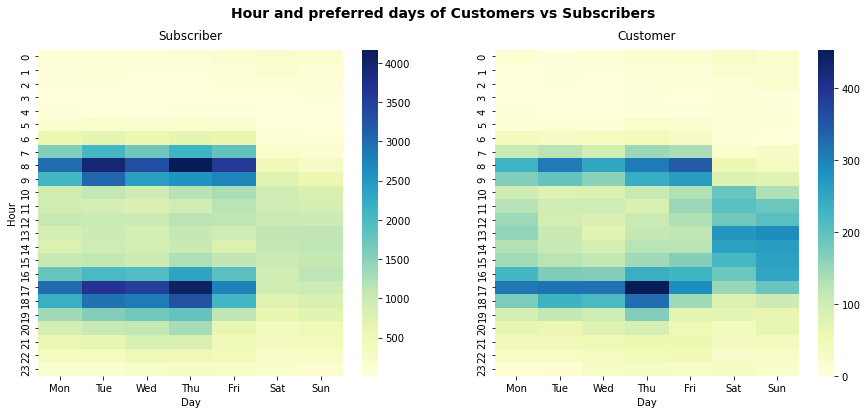

In [16]:
ford_copy['start_time_day'] = pd.Categorical(ford_copy['start_time_day'], 
                                             categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
plt.figure(figsize=(15,6))
plt.suptitle('Hour and preferred days of Customers vs Subscribers', fontsize=14, fontweight='semibold')

# heatmap for subscribers
plt.subplot(1, 2, 1)
ford_subscriber = ford_copy.query('user_type == "Subscriber"').groupby(
    ['start_hour', 'start_time_day'])['bike_id'].size().reset_index()
ford_subscriber = ford_subscriber.pivot('start_hour', 'start_time_day', 'bike_id')
sns.heatmap(ford_subscriber, cmap='YlGnBu')

plt.title("Subscriber", y=1.015)
plt.xlabel('Day')
plt.ylabel('Hour');

# heatmap for customers
plt.subplot(1, 2, 2)
ford_customer = ford_copy.query('user_type == "Customer"').groupby([ 'start_hour', 'start_time_day'])['bike_id'].size().reset_index()
ford_customer = ford_customer.pivot('start_hour', 'start_time_day', 'bike_id')
sns.heatmap(ford_customer, cmap="YlGnBu")


plt.title("Customer", y=1.015)
plt.xlabel('Day')
plt.ylabel('');

In [19]:
!jupyter nbconvert "Part_II_FordGoBike_Slide_Deck.ipynb" --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_FordGoBike_Slide_Deck.ipynb to slides
[NbConvertApp] Writing 703321 bytes to Part_II_FordGoBike_Slide_Deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Wekesa\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Wekesa\Anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\Wekesa\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Wekesa\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Wekesa\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filena